In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sklearn
import numpy as np
import pandas as pd
import gc

In [ ]:

# read in the csv containing the urls and type
df = pd.read_csv('/content/drive/Shareddrives/Machine Learning Final Project/data/malicious_urls.csv')
df['type'].value_counts()

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

In [ ]:
mal_type = {'benign': 0, 'defacement': 1, 'phishing': 1, 'malware': 1}
df['label'] = [mal_type[item] for item in df['type']]
df

,url,type,label
0,br-icloud.com.br,phishing,1
1,mp3raid.com/music/krizz_kaliko.html,benign,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1
...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,1
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,1
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,1
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,1


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import *
import random
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import HashingVectorizer

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

vectorizer = HashingVectorizer(n_features = 500)

vector = vectorizer.fit_transform(df['url'])
vector = vector.toarray()
labels = df['label']

X_train, X_test, y_train, y_test = train_test_split(vector, labels, test_size=0.33, random_state=42)

In [ ]:

model = Sequential()
model.add(Dense(90, input_shape = (None,vector.shape[1]), activation = 'softmax'))
model.add(Dense(50, activation='relu', kernel_initializer="uniform"))
model.add(Dense(24, activation='relu', kernel_initializer="uniform"))
model.add(Dense(12, activation='relu', kernel_initializer="uniform"))
model.add(Dense(1, activation='sigmoid', kernel_initializer='uniform'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics= ['accuracy'])

In [ ]:

history = model.fit(X_train, y_train, validation_split = 0.33, epochs = 100, batch_size = 5000)

Epoch 1/100
59/59 [==============================] - 3s 36ms/step - loss: 0.6873 - accuracy: 0.6511 - val_loss: 0.6779 - val_accuracy: 0.6576
Epoch 2/100
59/59 [==============================] - 2s 32ms/step - loss: 0.6568 - accuracy: 0.6565 - val_loss: 0.6426 - val_accuracy: 0.6576
Epoch 3/100
59/59 [==============================] - 2s 32ms/step - loss: 0.6416 - accuracy: 0.6565 - val_loss: 0.6376 - val_accuracy: 0.6576
Epoch 4/100
59/59 [==============================] - 2s 32ms/step - loss: 0.6243 - accuracy: 0.6565 - val_loss: 0.5886 - val_accuracy: 0.6576
Epoch 5/100
59/59 [==============================] - 2s 32ms/step - loss: 0.5127 - accuracy: 0.6565 - val_loss: 0.4617 - val_accuracy: 0.6576
Epoch 6/100
59/59 [==============================] - 2s 32ms/step - loss: 0.4454 - accuracy: 0.7467 - val_loss: 0.4295 - val_accuracy: 0.8706
Epoch 7/100
59/59 [==============================] - 2s 32ms/step - loss: 0.4193 - accuracy: 0.8767 - val_loss: 0.4081 - val_accuracy: 0.8833
Epoch 

In [ ]:
from sklearn.metrics import confusion_matrix
label_predict = model.predict(X_test)
rounded = (label_predict  > 0.5).astype(int)
cm = confusion_matrix(y_test, rounded)
scores = model.evaluate(X_test,y_test)

6716/6716 [==============================] - 7s 1ms/step - loss: 0.1787 - accuracy: 0.9358


In [ ]:
print(classification_report(y_test, rounded, target_names=['Benign', 'Malicious']))

              precision    recall  f1-score   support

      Benign       0.94      0.97      0.95    141516
   Malicious       0.94      0.87      0.90     73378

    accuracy                           0.94    214894
   macro avg       0.94      0.92      0.93    214894
weighted avg       0.94      0.94      0.94    214894



In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

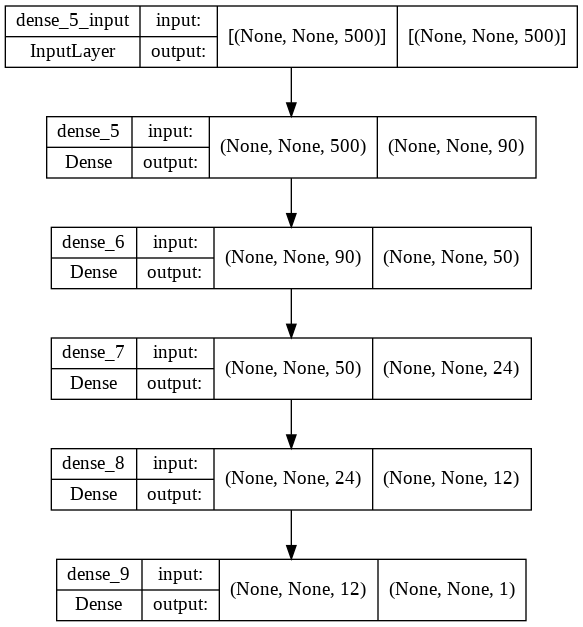

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
